# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"


In [5]:
# Fetch current BTC price
url_data = requests.get(btc_url)
btc_data = url_data.json()
current_btc = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
url_data = requests.get(eth_url)
eth_data = url_data.json()
current_eth = eth_data["data"]["1027"]["quotes"]["USD"]["price"]


# Compute current value of my crpto
my_btc_value = my_btc * current_btc
my_eth_value = my_eth * current_eth
total_value_of_my_crypto = my_eth_value + my_btc_value 

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f} USD")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f} USD")
print(f"The total value of the whole crypto wallet is ${total_value_of_my_crypto:0.2f} USD")

The current value of your 1.2 BTC is $39622.80 USD
The current value of your 5.3 ETH is $10599.05 USD
The total value of the whole crypto wallet is $50221.85 USD


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,)

In [8]:
# Format current date as ISO format
current_date = pd.to_datetime("today")

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
investments_df = api.get_barset(
    tickers,
    timeframe,
    start = "today",
    end = "today").df

# Preview DataFrame
investments_df.head()

AGG                                     \
                               open    high       low   close   volume   
time                                                                     
2021-01-28 00:00:00-05:00  117.4800  117.49  117.2900  117.43  4440895   
2021-01-29 00:00:00-05:00  117.1563  117.40  116.5625  117.32  7119889   
2021-02-01 00:00:00-05:00  117.2000  117.26  117.0915  117.21  5469814   
2021-02-02 00:00:00-05:00  116.9900  117.09  116.9700  117.05  4694446   
2021-02-03 00:00:00-05:00  116.9700  116.99  116.8700  116.89  5060310   

                               SPY                                       
                              open    high       low   close     volume  
time                                                                     
2021-01-28 00:00:00-05:00  376.360  381.93  375.8900  377.60   75229306  
2021-01-29 00:00:00-05:00  375.630  376.67  368.2700  370.19  106397082  
2021-02-01 00:00:00-05:00  373.720  377.34  370.3760  376.18   64056510  
2021-02-02 00:00:00-05:00  379.650  383.22  376.3181  381.54   53979346  
2021-02-03 00:00:00-05:00  382.435  383.70  380.4800  381.86   43305661

In [9]:
# Pick AGG and SPY close prices using iloc 
agg_close = investments_df["AGG"]["close"].iloc[0]
spy_close = investments_df["SPY"]["close"].iloc[0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close} USD")
print(f"Current SPY closing price: ${spy_close} USD")

Current AGG closing price: $117.43 USD
Current SPY closing price: $377.6 USD


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close
my_spy_value = my_spy * spy_close
total_value_of_my_shares = my_spy_value + my_agg_value 

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f} USD")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f} USD")
print(f"The total value of the whole crypto wallet is ${total_value_of_my_shares:0.2f} USD")

The current value of your 50 SPY shares is $18880.00 USD
The current value of your 200 AGG shares is $23486.00 USD
The total value of the whole crypto wallet is $42366.00 USD


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_assets_dict = {'Total': [total_value_of_my_crypto , total_value_of_my_shares]}

# Create savings DataFrame
savings = pd.DataFrame(total_assets_dict, index=['Crypto','Shares'])

# Display savings DataFrame
display(savings)

,Total
Crypto,50221.846
Shares,42366.000


array([<AxesSubplot:ylabel='Total'>], dtype=object)

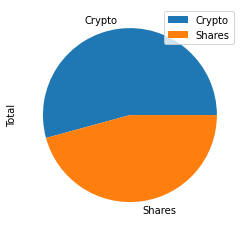

In [12]:
# Plot savings pie chart
savings.plot(kind= 'pie', subplots = True)

In [13]:
# Set ideal emergency fund
emergency_funding = monthly_income * 3

# Calculate total amount of savings
total_savings = savings.sum().item()

# Validate saving health
if total_savings > emergency_funding:
    print("Congratulations on having a substancial emergency fund!"),
elif total_savings == emergency_funding:
    print("Congratulations for having an emergency fund."),
else:
    print(f'You need ${emergency_funding - total_savings} ASAP to have enough for an emergency.')

Congratulations on having a substancial emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date).df

# Display sample data
stock_data.head(1000)

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   
...                           ...       ...       ...     ...      ...   
2021-04-26 00:00:00-04:00  114.74  114.8015  114.6500  114.65  2867784   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.3700  114.37  3421667   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.2000  114.44  6185936   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.0900  114.37  5796983   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.3300  114.50  5160765   

                              SPY                                          
                             open      high       low     close    volume  
time                                                                       
2020-12-07 00:00:00-05:00  369.02  369.6200  367.7200  369.1200  40456544  
2020-12-08 00:00:00-05:00  367.72  370.7800  367.6700  370.1599  32702217  
2020-12-09 00:00:00-05:00  370.88  371.0500  365.9500  366.8900  60700254  
2020-12-10 00:00:00-05:00  365.37  367.8600  364.4300  366.7200  47851654  
2020-12-11 00:00:00-05:00  364.90  366.7402  363.2600  366.2800  47917103  
...                           ...       ...       ...       ...       ...  
2021-04-26 00:00:00-04:00  417.44  418.2200  416.8111  417.6400  44689009  
2021-04-27 00:00:00-04:00  417.91  418.1400  416.3000  417.4800  45962655  
2021-04-28 00:00:00-04:00  417.81  419.0100  416.9000  417.3500  45533863  
2021-04-29 00:00:00-04:00  420.33  420.7200  416.4400  419.9800  70595229  
2021-04-30 00:00:00-04:00  417.63  418.5400  416.3400  417.3000  73129109  

[100 rows x 10 columns]

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
thirty_year_mcs = MCSimulation(
    portfolio_data = stock_data,
    weights = [.40,.60],
    num_trading_days = 252*30,
    num_simulation = 500)

In [17]:
# Printing the simulation input data
thirty_year_mcs.portfolio_data

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   
...                           ...       ...       ...     ...      ...   
2021-04-26 00:00:00-04:00  114.74  114.8015  114.6500  114.65  2867784   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.3700  114.37  3421667   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.2000  114.44  6185936   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.0900  114.37  5796983   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.3300  114.50  5160765   

                                           SPY                                \
                          daily_return    open      high       low     close   
time                                                                           
2020-12-07 00:00:00-05:00          NaN  369.02  369.6200  367.7200  369.1200   
2020-12-08 00:00:00-05:00     0.000170  367.72  370.7800  367.6700  370.1599   
2020-12-09 00:00:00-05:00    -0.001274  370.88  371.0500  365.9500  366.8900   
2020-12-10 00:00:00-05:00     0.002211  365.37  367.8600  364.4300  366.7200   
2020-12-11 00:00:00-05:00     0.001272  364.90  366.7402  363.2600  366.2800   
...                                ...     ...       ...       ...       ...   
2021-04-26 00:00:00-04:00    -0.000871  417.44  418.2200  416.8111  417.6400   
2021-04-27 00:00:00-04:00    -0.002442  417.91  418.1400  416.3000  417.4800   
2021-04-28 00:00:00-04:00     0.000612  417.81  419.0100  416.9000  417.3500   
2021-04-29 00:00:00-04:00    -0.000612  420.33  420.7200  416.4400  419.9800   
2021-04-30 00:00:00-04:00     0.001137  417.63  418.5400  416.3400  417.3000   

                                                  
                             volume daily_return  
time                                              
2020-12-07 00:00:00-05:00  40456544          NaN  
2020-12-08 00:00:00-05:00  32702217     0.002817  
2020-12-09 00:00:00-05:00  60700254    -0.008834  
2020-12-10 00:00:00-05:00  47851654    -0.000463  
2020-12-11 00:00:00-05:00  47917103    -0.001200  
...                             ...          ...  
2021-04-26 00:00:00-04:00  44689009     0.002208  
2021-04-27 00:00:00-04:00  45962655    -0.000383  
2021-04-28 00:00:00-04:00  45533863    -0.000311  
2021-04-29 00:00:00-04:00  70595229     0.006302  
2021-04-30 00:00:00-04:00  73129109    -0.006381  

[100 rows x 12 columns]

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
thirty_year_mcs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

In [ ]:
# Plot simulation outcomes
thirty_year_mcs.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
thirty_year_mcs.plot_distribution()

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
table = thirty_year_mcs.summarize_cumulative_return()

# Print summary statistics
print(table)

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(table [8] * initial_investment, 2)
ci_upper = round(table [9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(table [8] * initial_investment, 2)
ci_upper = round(table [9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")